In [1]:
import subprocess
import random
import numpy as np
import time
import os
import csv
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib
import glob
import getpass
from pathlib import Path
import seaborn as sns

sns.set()
sns.set_theme(style="whitegrid")
sns.set_palette("bright")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
for (r,g,b) in sns.color_palette("bright", 4):
    print('#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)))
sns.color_palette("bright", 4)

#023eff
#ff7c00
#1ac938
#e8000b


[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784)]

In [3]:
colors = sns.color_palette("bright", 4)
fontsize=16
figsize = (12, 6)

def plotIndividualData(algorithm):
    processor_list = np.array(getProcessorList())
    for i, processor in enumerate(processor_list):
        fig0, ax0 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig1, ax1 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig2, ax2 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig3, ax3 = plt.subplots(1,1,figsize=figsize, sharey=True)
        fig4, ax4 = plt.subplots(1,1,figsize=figsize, sharey=True)
#         print(processor)
        filename = f'./results/processors/{processor}/result_{algorithm}.txt'
        with open(filename) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=';')
            line_count = 0
            array_size = []
            time_spent = []
            PAPI_L1_TCM = []
            PAPI_L2_TCM = []
            PAPI_L3_TCM = []
            DATA_BYTES = []
            NUM_INSTRUCTIONS = []
            PAPI_TOT_INS = []
            theorical_instructions_per_second = []
            papi_instructions_per_second = []
            for row in csv_reader:
                if line_count == 0:
#                     print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    array_size.append(int(row[0]))
                    time_spent.append(float(row[1]))
                    PAPI_L1_TCM.append(int(row[2]))
                    PAPI_L2_TCM.append(int(row[3]))
                    PAPI_L3_TCM.append(int(row[4]))
                    DATA_BYTES.append(int(row[5]))
                    NUM_INSTRUCTIONS.append(int(row[6]))
                    PAPI_TOT_INS.append(int(row[7]))
                    papi_instructions_per_second.append(int(row[7]) / float(row[1]))
                    theorical_instructions_per_second.append(int(row[6]) / float(row[1]))
                    line_count += 1
                    
            ax0.plot(DATA_BYTES, PAPI_L1_TCM, label=processor.replace("_", " "), color=colors[i])
            ax0.set_xlabel('Bytes')
            ax0.set_ylabel('L1 MISS')
            ax0.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x L1 Miss', fontsize=fontsize)
            ax0.margins(x=0.005, y=0.01)
            ax0.grid()
            ax0.legend()
            ax0.set_yscale('log', base=10)
            ax0.set_xscale('log', base=2)
                    
            ax1.plot(DATA_BYTES, PAPI_L2_TCM, label=processor.replace("_", " "), color=colors[i])
            ax1.set_xlabel('Bytes')
            ax1.set_ylabel('L2 MISS')
            ax1.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x L2 Miss', fontsize=fontsize)
            ax1.margins(x=0.005, y=0.01)
            ax1.grid()
            ax1.legend()
            ax1.set_yscale('log', base=10)
            ax1.set_xscale('log', base=2)
                    
            ax2.plot(DATA_BYTES, PAPI_L3_TCM, label=processor.replace("_", " "), color=colors[i])
            ax2.set_xlabel('Bytes')
            ax2.set_ylabel('L3 MISS')
            ax2.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x L3 Miss', fontsize=fontsize)
            ax2.margins(x=0.005, y=0.01)
            ax2.grid()
            ax2.legend()
            ax2.set_yscale('log', base=10)
            ax2.set_xscale('log', base=2)

            
            ax3.plot(DATA_BYTES, papi_instructions_per_second, label=processor.replace("_", " "), color=colors[i])
            ax3.set_xlabel('Bytes')
            ax3.set_ylabel('Instructions/s')
            ax3.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x Instructions/s', fontsize=fontsize)
            ax3.margins(x=0.005, y=0.01)
            ax3.grid()
            ax3.legend()
            ax3.set_xscale('log', base=2)
    
#             scale_y = 1e6
#             ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#             ax3.yaxis.set_major_formatter(ticks)

            
            ax4.plot(DATA_BYTES, time_spent, label=processor.replace("_", " "), color=colors[i])
            ax4.set_xlabel('Bytes')
            ax4.set_ylabel('Elapsed time')
            ax4.set_title(f'{algorithm.replace("_", " ").title()} - {processor.replace("_", " ")} - Bytes x Elapsed time', fontsize=fontsize)
            ax4.margins(x=0.005, y=0.01)
            ax4.grid()
            ax4.legend()
#             ax4.set_yscale('log', base=10)
            ax4.set_yscale('linear')
            ax4.set_xscale('log', base=2)
        
            if 'quick' in algorithm:
                ax1.set_ylim((5.309703301476311, 1378262.3217318489))
                ax1.set_ylim((5.309703301476311, 1378262.3217318489))
                ax2.set_ylim((5.309703301476311, 1378262.3217318489))
                ax3.set_ylim((1272153.0608099466, 7450226.300497908))
                ax4.set_ylim((-0.155190006906, 29.444191248305998))
            elif 'merge' in algorithm:
                ax0.set_ylim((4.464597068656053, 464441.6882673319))
                ax1.set_ylim((4.464597068656053, 464441.6882673319))
                ax2.set_ylim((4.464597068656053, 464441.6882673319))
                ax3.set_ylim((2452020.1737969154, 12526744.498185785))
                ax4.set_ylim((-0.06799001825899997, 21.860991833958998))
                

#         plt.subplots_adjust(hspace=0.4)
#         fig.suptitle(algorithm.replace("_", " ").title(), fontsize=fontsize)
        plt.show()
        bbox_inches, dpi = 'tight', 300
        fig0.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x L1 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
        fig1.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x L2 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
        fig2.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x L3 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
        fig3.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x Instructions-s.png', bbox_inches = bbox_inches, dpi=dpi)
        fig4.savefig(f'./charts/{algorithm}/{algorithm.replace("_", " ").title()} - {processor} - Bytes x Elapsed time.png', bbox_inches = bbox_inches, dpi=dpi)
            
            
#     plt.legend()
#     fig.savefig(f'./charts/{algorithm}.png', bbox_inches = 'tight', dpi=300)
    

def plotData(algorithm):
    processor_list = np.array(getProcessorList())
    fig0, ax0 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig1, ax1 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig2, ax2 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig3, ax3 = plt.subplots(1,1,figsize=figsize, sharey=True)
    fig4, ax4 = plt.subplots(1,1,figsize=figsize, sharey=True)
#     print(axs)
#     if axs.shape == (2,):
#         axs = np.reshape(axs, (1, axs.shape[0]))
    for i, processor in enumerate(processor_list):
#         print(processor)
        filename = f'./results/processors/{processor}/result_{algorithm}.txt'
        with open(filename) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=';')
            line_count = 0
            array_size = []
            time_spent = []
            PAPI_L1_TCM = []
            PAPI_L2_TCM = []
            PAPI_L3_TCM = []
            DATA_BYTES = []
            NUM_INSTRUCTIONS = []
            PAPI_TOT_INS = []
            theorical_instructions_per_second = []
            papi_instructions_per_second = []
            for row in csv_reader:
                if line_count == 0:
#                     print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    array_size.append(int(row[0]))
                    time_spent.append(float(row[1]))
                    PAPI_L1_TCM.append(int(row[2]))
                    PAPI_L2_TCM.append(int(row[3]))
                    PAPI_L3_TCM.append(int(row[4]))
                    DATA_BYTES.append(int(row[5]))
                    NUM_INSTRUCTIONS.append(int(row[6]))
                    PAPI_TOT_INS.append(int(row[7]))
                    papi_instructions_per_second.append(int(row[7]) / float(row[1]))
                    theorical_instructions_per_second.append(int(row[6]) / float(row[1]))
                    line_count += 1
                    
            ax0.plot(DATA_BYTES, PAPI_L1_TCM, label=processor.replace("_", " "))
            ax0.set_xlabel('Bytes')
            ax0.set_ylabel('L1 MISS')
            ax0.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x L1 Miss', fontsize=fontsize)
            ax0.margins(x=0.005, y=0.01)
            ax0.grid()
            ax0.legend()
            ax0.set_yscale('log', base=10)
            ax0.set_xscale('log', base=2)
                    
            ax1.plot(DATA_BYTES, PAPI_L2_TCM, label=processor.replace("_", " "))
            ax1.set_xlabel('Bytes')
            ax1.set_ylabel('L2 MISS')
            ax1.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x L2 Miss', fontsize=fontsize)
            ax1.margins(x=0.005, y=0.01)
            ax1.grid()
            ax1.legend()
            ax1.set_yscale('log', base=10)
            ax1.set_xscale('log', base=2)
                    
            ax2.plot(DATA_BYTES, PAPI_L3_TCM, label=processor.replace("_", " "))
            ax2.set_xlabel('Bytes')
            ax2.set_ylabel('L3 MISS')
            ax2.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x L3 Miss', fontsize=fontsize)
            ax2.margins(x=0.005, y=0.01)
            ax2.grid()
            ax2.legend()
            ax2.set_yscale('log', base=10)
            ax2.set_xscale('log', base=2)

            
            ax3.plot(DATA_BYTES, papi_instructions_per_second, label=processor.replace("_", " "))
            ax3.set_xlabel('Bytes')
            ax3.set_ylabel('Instructions/s')
            ax3.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x Instructions/s', fontsize=fontsize)
            ax3.margins(x=0.005, y=0.01)
            ax3.grid()
#             ax3.legend()
#             print(ax3.get_yscale())
            ax3.set_xscale('log', base=2)
    
#             scale_y = 1e6
#             ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#             ax3.yaxis.set_major_formatter(ticks)

            
            ax4.plot(DATA_BYTES, time_spent, label=processor.replace("_", " "))
            ax4.set_xlabel('Bytes')
            ax4.set_ylabel('Elapsed time')
            ax4.set_title(f'{algorithm.replace("_", " ").title()} - Bytes x Elapsed time', fontsize=fontsize)
            ax4.margins(x=0.005, y=0.01)
            ax4.grid()
            ax4.legend()
#             ax4.set_yscale('log', basey=10)
            ax4.set_yscale('linear')
            ax4.set_xscale('log', base=2)
        
            if 'quick' in algorithm:
                ax1.set_ylim((5.309703301476311, 1378262.3217318489))
                ax1.set_ylim((5.309703301476311, 1378262.3217318489))
                ax2.set_ylim((5.309703301476311, 1378262.3217318489))
                ax3.set_ylim((1272153.0608099466, 7450226.300497908))
                ax4.set_ylim((-0.155190006906, 29.444191248305998))
            elif 'merge' in algorithm:
                ax0.set_ylim((4.464597068656053, 464441.6882673319))
                ax1.set_ylim((4.464597068656053, 464441.6882673319))
                ax2.set_ylim((4.464597068656053, 464441.6882673319))
                ax3.set_ylim((2452020.1737969154, 12526744.498185785))
                ax4.set_ylim((-0.06799001825899997, 21.860991833958998))
        
        
    plt.show()
    bbox_inches, dpi = 'tight', 300
    fig0.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x L1 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
    fig1.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x L2 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
    fig2.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x L3 Miss.png', bbox_inches = bbox_inches, dpi=dpi)
    fig3.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x Instructions-s.png', bbox_inches = bbox_inches, dpi=dpi)
    fig4.savefig(f'./charts/{algorithm.replace("_", " ").title()} - Bytes x Elapsed time.png', bbox_inches = bbox_inches, dpi=dpi)

def getProcessorList():
    dirlist = []
    for filename in os.listdir("./results/processors/"):
        if os.path.isdir(os.path.join("./results/processors/",filename)):
            dirlist.append(filename)
    if '.ipynb_checkpoints' in dirlist:
        dirlist.remove('.ipynb_checkpoints')
    return dirlist

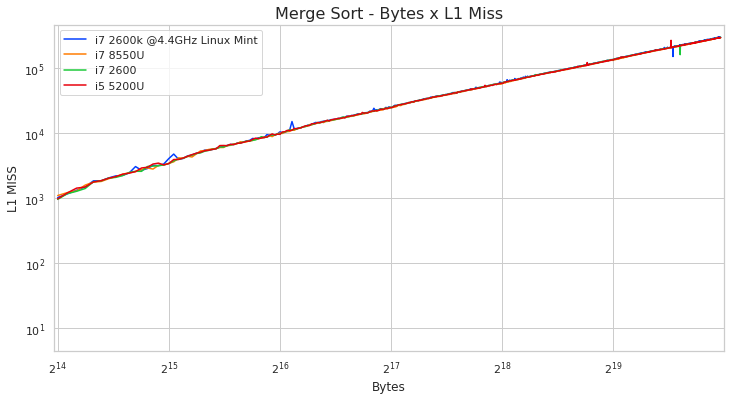

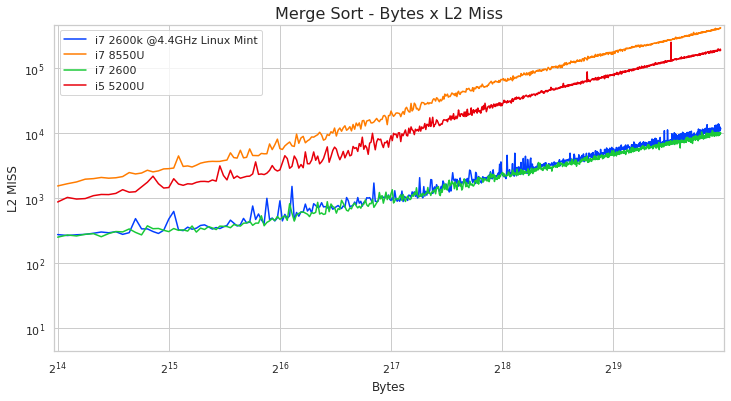

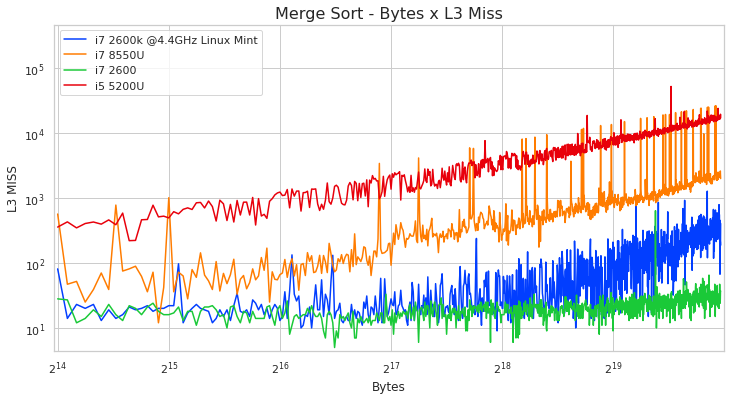

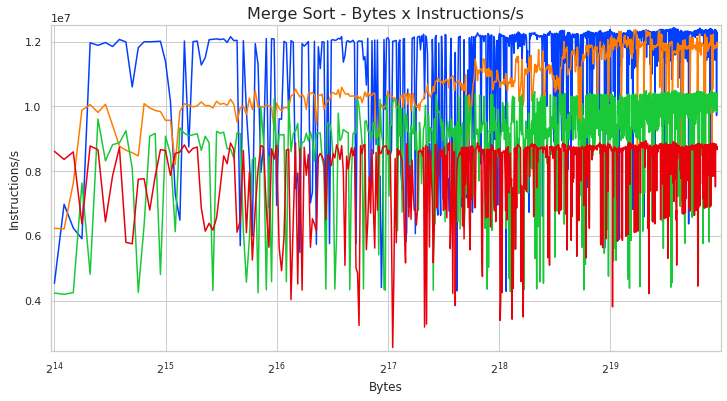

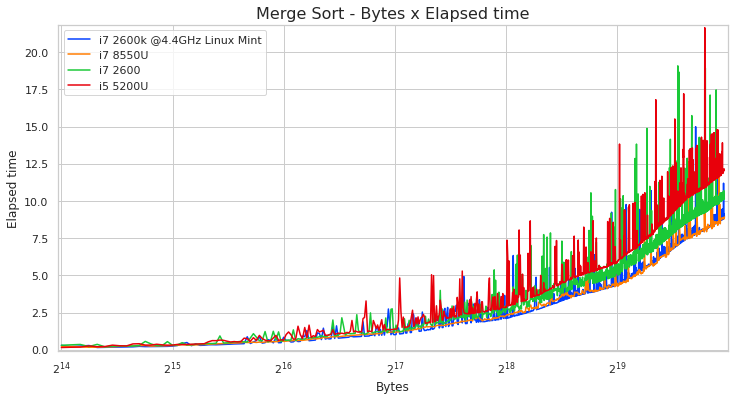

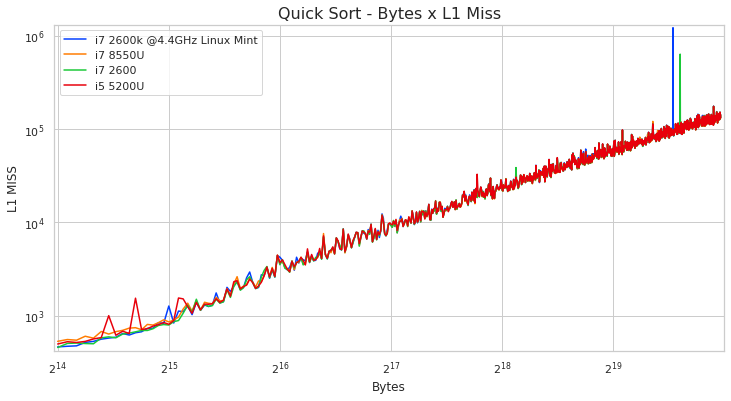

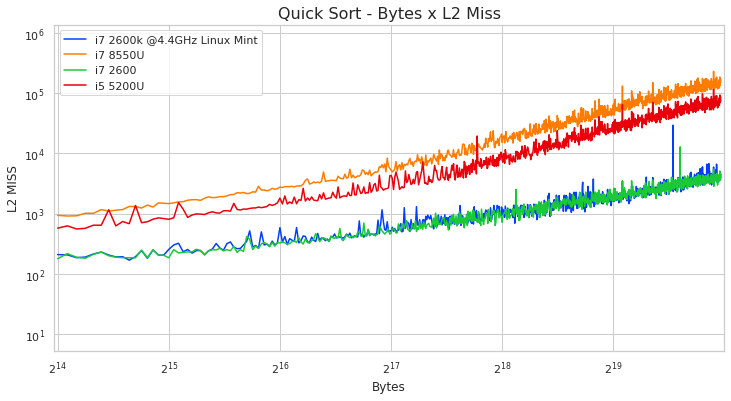

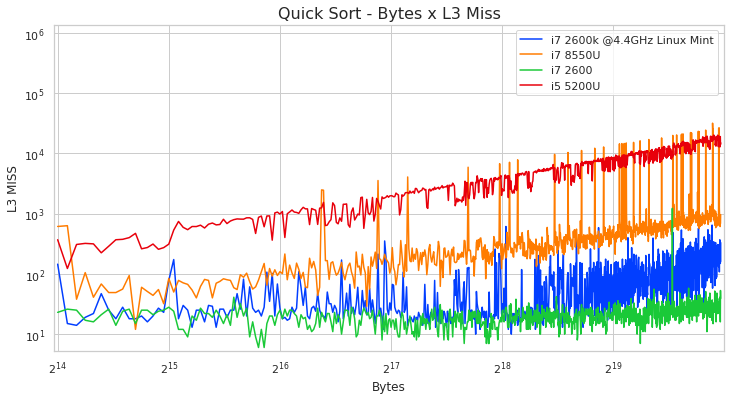

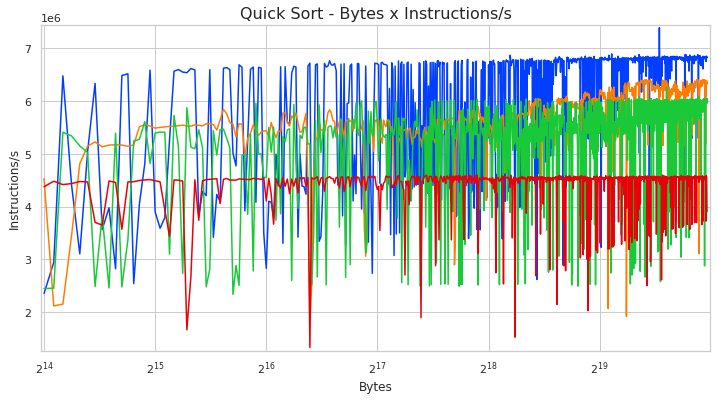

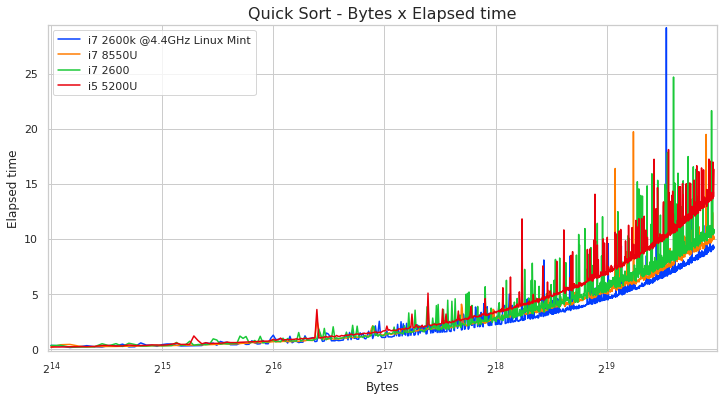

In [4]:
for filename in ['merge_sort.cpp', 'quick_sort.cpp']:
    plotData(filename[:-4])
#     plotIndividualData(filename[:-4])